### Multivariate forecasting using Random Forest

Mean Squared Error: 1.7802349371928896e-08


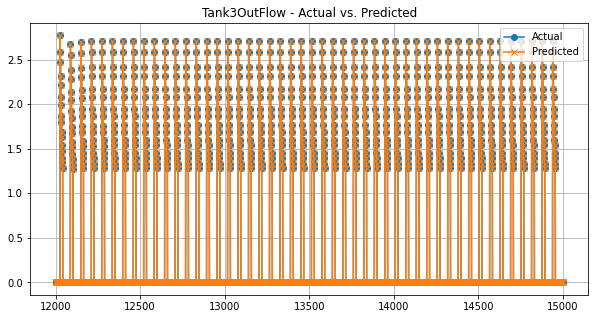

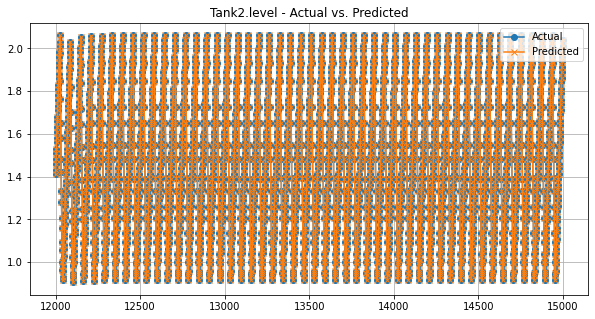

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your time series data from a CSV file
data = pd.read_csv('waterTank_Golden_reduced.csv')

# Define the target variables and features
# Assuming 'target1' and 'target2' are the columns to predict, and 'feature1', 'feature2', ... are your input features.
target_cols = ['Tank3OutFlow', 'Tank2.level']
feature_cols = ['Tank2OutFlow', 'Tank2.puddle', 'Tank3OutFlow', 'Tank2.level', 'wt3_valve']

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

X_train = train_data[feature_cols]
y_train = train_data[target_cols]
X_test = test_data[feature_cols]
y_test = test_data[target_cols]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values for each target variable
for i, target_col in enumerate(target_cols):
    plt.figure(figsize=(10, 5))
    plt.plot(test_data.index, y_test[target_col], label='Actual', marker='o')
    plt.plot(test_data.index, y_pred[:, i], label='Predicted', marker='x')
    plt.title(f'{target_col} - Actual vs. Predicted')
    plt.legend()
    plt.grid()
    plt.show()


### Multivariate forecasting using CNN (Convolution Neural Network)

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your multivariate time series data (CSV file, for example)
# Make sure your data has a shape of (num_samples, num_timesteps, num_features)
data = pd.read_csv('waterTank_Golden_reduced.csv')
num_timesteps = 10  # Adjust this based on your data and forecasting horizon

# Define the target variable(s) and features
target_cols = ['Tank3OutFlow', 'Tank2.level']
feature_cols = ['Tank2OutFlow', 'Tank2.puddle', 'Tank3OutFlow', 'Tank2.level', 'wt3_valve']

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

X_train = train_data[feature_cols].values
y_train = train_data[target_cols].values
X_test = test_data[feature_cols].values
y_test = test_data[target_cols].values

# Standardize the input features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create data sequences for the CNN
def create_sequences(data, num_timesteps):
    sequences = []
    for i in range(len(data) - num_timesteps + 1):
        sequence = data[i:i + num_timesteps]
        sequences.append(sequence)
    return np.array(sequences)

X_train = create_sequences(X_train, num_timesteps)
X_test = create_sequences(X_test, num_timesteps)

# Build the 1D CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(num_timesteps, len(feature_cols))),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(target_cols))  # Adjust output layer based on the number of target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

# Make predictions
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values for each target variable
for i, target_col in enumerate(target_cols):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label='Actual', marker='o')
    plt.plot(y_pred[:, i], label='Predicted', marker='x')
    plt.title(f'{target_col} - Actual vs. Predicted')
    plt.legend()
    plt.grid()
    plt.show()


Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0565 - val_loss: 0.0107
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 7.5526e-04 - val_loss: 0.0014
Epoch 4/20
300/300 [==============================] - 1s 2ms/step - loss: 4.2823e-04 - val_loss: 0.0014
Epoch 5/20
300/300 [==============================] - 1s 2ms/step - loss: 2.8474e-04 - val_loss: 9.6374e-04
Epoch 6/20
300/300 [==============================] - 1s 2ms/step - loss: 2.3685e-04 - val_loss: 7.5074e-04
Epoch 7/20
300/300 [==============================] - 1s 2ms/step - loss: 2.7386e-04 - val_loss: 8.9726e-04
Epoch 8/20
300/300 [==============================] - 1s 2ms/step - loss: 8.2137e-04 - val_loss: 5.4903e-04
Epoch 9/20
300/300 [==============================] - 1s 2ms/step - loss: 1.5343e-04 - val_loss: 4.3051e-04
Epoch 10/20
300/300 [==============================]

ValueError: Data cardinality is ambiguous:
  x sizes: 2992
  y sizes: 3001
Make sure all arrays contain the same number of samples.

### Function to create a new model

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

def create_lstm_multivariate_model(input_shape, num_lstm_units=50, num_dense_units=30, num_outputs=1, dropout_rate=0.0):
    """
    Create an LSTM model for multivariate time series forecasting.

    Parameters:
    - input_shape (tuple): Shape of input data (num_timesteps, num_features).
    - num_lstm_units (int): Number of LSTM units.
    - num_dense_units (int): Number of units in the dense layer.
    - num_outputs (int): Number of output neurons.
    - dropout_rate (float): Dropout rate for regularization.

    Returns:
    - model (tf.keras.Model): LSTM model.
    """
    model = tf.keras.Sequential([
        layers.LSTM(num_lstm_units, activation='relu', input_shape=input_shape, return_sequences=True),
        layers.Dropout(dropout_rate),
        layers.LSTM(num_lstm_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_outputs)  # Adjust the number of output neurons based on your problem
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')  # You can change the optimizer and loss function as needed

    return model

# Example usage:
num_timesteps = 10  # Number of time steps
num_features = 3  # Number of input features
num_outputs = 2  # Number of output neurons (for example, if you have two target variables)

# Create the model
input_shape = (num_timesteps, num_features)
lstm_model = create_lstm_multivariate_model(input_shape, num_lstm_units=64, num_dense_units=32, num_outputs=num_outputs, dropout_rate=0.2)

# Display the model summary
lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17408     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                